In [2]:
from glob import glob
from keras.models import load_model
from matplotlib import pyplot as plt
%matplotlib inline
from PIL import Image
from random import uniform, random, choice, sample
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from scipy.spatial import distance

import cv2
import mahotas as mh
import numpy as np
import pandas as pd

In [3]:
# 1단계 - 카테고리 맞추기

In [7]:
model = load_model('')  # 여자옷 학습시킨 모델이 있는 경로

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 80, 80, 32)        896       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 80, 80, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 80, 80, 32)        9248      
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 80, 80, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 40, 40, 32)        0         
_______________________________________

In [8]:
categories = ["woman_bottoms_jeans","woman_bottoms_pants","woman_bottoms_skirt_long","woman_bottoms_skirt_short",
              "woman_top_hoodie","woman_top_hoodie_print","woman_top_knit","woman_top_knit_print",
              "woman_top_shirt_long","woman_top_shirt_long_print","woman_top_sweatshirt","woman_top_sweatshirt_print",
              "woman_top_tshirt_long","woman_top_tshirt_long_print","woman_top_tshirt_short","woman_top_tshirt_short_print",
              "woman_top_blouse_long","woman_top_blouse_long_print"]

In [9]:
# 사용자가 입력한 이미지파일(여기서 한 번!)
test = './test.jpg'

img = Image.open(test)
img = img.convert("RGB")
img = img.resize((80,80))
data = np.asarray(img)
X = np.array(data)
X = X.astype("float") / 256
X = X.reshape(-1, 80, 80,3)

In [10]:
pred = model.predict(X)  
result = [np.argmax(value) for value in pred]
print('New data category : ',categories[result[0]])

New data category :  woman_top_shirt_long_print


In [11]:
# 2단계 - 우리가 가지고 있는 이미지 소스 중에서 유사한 옷 가져오기

In [12]:
woman_images = []
                    # 여자 옷 이미지 소스 경로 (!! categorical_name이 파일명인 이미지파일)
woman_images = glob('./total_img_mer/woman/*.png')

In [13]:
image_names = []
for img in woman_images:
    image_names.append(img.split("woman\\")[1])

In [14]:
# 사용자가 입력한 이미지파일(여기서 또 한 번!)
image = "./test.jpg"
woman_images.append(image)

In [15]:
# 유사분류기에 쓸 여자옷 배열 파일 불러오기
features = np.load("./woman_features.npy")
labels = np.load("./woman_labels.npy")

In [16]:
# 유사분류기에 쓸 여자옷 이름매칭 엑셀파일 불러오기 
df_nm_match = pd.read_csv("woman_nm_match.csv")

In [17]:
image = cv2.imread(image)
image = image.astype(np.uint8)
insert_data_feature = mh.features.haralick(image).ravel()
# 1단계에서 나온 결과를 여기로 호출
insert_data_label = categories[result[0]]

np_insert_data_feature = np.array(insert_data_feature)
np_insert_data_label = np.array(insert_data_label)

In [18]:
new_features = np.vstack((features,np_insert_data_feature))
new_labels = np.append([labels],[np_insert_data_label])

In [19]:
clf = Pipeline([('preproc', StandardScaler()), ('classifier', LogisticRegression())])

In [20]:
sc = StandardScaler()
features_02 = sc.fit_transform(new_features)

In [21]:
dists = distance.squareform(distance.pdist(features_02))

In [22]:
def selectImage(n, m, dists, images):
    image_position = dists[n].argsort()[m]
    image = cv2.imread(woman_images[image_position])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def get_position(n, m, dists, images):
    image_position = dists[n].argsort()[m]
    return image_position

def plotImage_input(n):

    plt.imshow(selectImage(n,0, dists, woman_images))
    plt.title("input")
    plt.xticks([])
    plt.yticks([])
    
def plotImage_similar1(n):

    plt.imshow(selectImage(n,1, dists, woman_images))
    merge_nm_2 = df_nm_match.iloc[get_position(n,1, dists, woman_images)][0]
    non_merge_nm_2 = df_nm_match.iloc[get_position(n,1, dists, woman_images)][1]
    
    plt.title(merge_nm_2)
    plt.xticks([])
    plt.yticks([])
    
def plotImage_similar2(n):

    plt.imshow(selectImage(n,2, dists, woman_images))
    merge_nm_3 = df_nm_match.iloc[get_position(n,2, dists, woman_images)][0]
    non_merge_nm_3 = df_nm_match.iloc[get_position(n,2, dists, woman_images)][1]
    
    plt.title(merge_nm_3)
    plt.xticks([])
    plt.yticks([])
    
def plotImage_similar3(n):

    plt.imshow(selectImage(n,3, dists, woman_images))
    merge_nm_4 = df_nm_match.iloc[get_position(n,3, dists, woman_images)][0]
    non_merge_nm_4 = df_nm_match.iloc[get_position(n,3, dists, woman_images)][1]
    
    plt.title(merge_nm_4)
    plt.xticks([])
    plt.yticks([])
    

In [24]:
similar_1_name_cat = df_nm_match.iloc[get_position(-1,1, dists, woman_images)][0]
similar_1_name_img = df_nm_match.iloc[get_position(-1,1, dists, woman_images)][1]
similar_2_name_cat = df_nm_match.iloc[get_position(-1,2, dists, woman_images)][0]
similar_2_name_img = df_nm_match.iloc[get_position(-1,2, dists, woman_images)][1]
similar_3_name_cat = df_nm_match.iloc[get_position(-1,3, dists, woman_images)][0]
similar_3_name_img = df_nm_match.iloc[get_position(-1,3, dists, woman_images)][1]

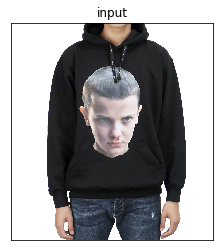

In [25]:
# 입력한 옷
plotImage_input(-1)

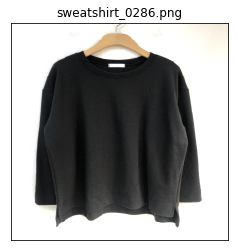

In [26]:
# 유사한 옷 1
plotImage_similar1(-1)

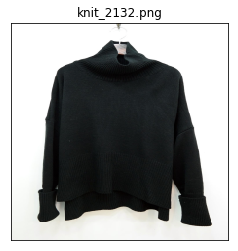

In [27]:
# 유사한 옷 2
plotImage_similar2(-1)

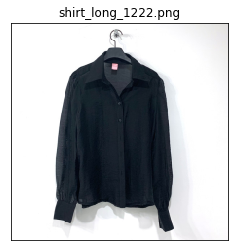

In [28]:
# 유사한 옷 3
plotImage_similar3(-1)

In [29]:
# 3단계 - 옷 추천하기

In [30]:
# 여자 상의 전부의 특성파일 불러오기
df_top = pd.read_csv('./recommender_mat/woman_top_onehot.csv')

In [31]:
df_top = df_top.set_index('index')

In [32]:
# 여자 하의 전부의 특성파일 불러오기
df_bottom = pd.read_csv('./recommender_mat/woman_bottom_onehot.csv')

In [33]:
df_bottom = df_bottom.set_index('index')

In [34]:
# 여자옷 전부의 속성 매트릭스파일 (어울림 정도 점수) 불러오기 
attr_mat = pd.read_excel("./recommender_mat/woman_attr_mat.xlsx", sheet_name='cat_mat',  index_col=0)

In [35]:
df_top_dic = {}
df_bottom_dic = {}

In [36]:
def retrieve_top_N(item, df, top_N = 3):
    if item[0] == 1:
        temp_df = df[item[1:]]
    else:
        df['bottom'] = df.index
        temp_df = df[df['bottom'].isin(item[1:])]
        del temp_df['bottom']
        temp_df = temp_df.transpose()        

    temp_df['total'] = temp_df.sum(axis=1)
    
    return temp_df.nlargest(top_N, 'total')

def top_filenames (dic_to_match, list_to_match):
    matching_files = []
    for filename,value in dic_to_match.items():
        if set(value) == set(list_to_match) :
            matching_files.append(filename)
    return matching_files

def shuffle_generator(rec):
    return (rec[idx] for idx in np.random.permutation(len(rec)))

def yielding(ls):
    for i in ls:
        yield i
        
def recommendation(file_name, top_bottom, attr_mat, show=True, top_N_rec=3):
    if top_bottom == 1:
        clothes_input = 'top'
        clothes_output = 'bottom'
        attr_df = df_top
        attr_dic = df_bottom_dic
    else:
        clothes_input = 'bottom'
        clothes_output = 'top'
        attr_df = df_bottom
        attr_dic = df_top_dic
    
    try:
        col = attr_df.loc[file_name]
        fn = file_name
  
    except:
        num = randint(0,len(attr_df))
        col = attr_df[num:num+1]
        fn = col.index[0]
    
    attribute_list = [top_bottom]
    df_col = pd.DataFrame(col[1:])
    
    for x in df_col.index:
        if col[x].sum() == 1 and x != 'category':
            attribute_list.append(x)
    
    print ("Filename:", fn)
    
    # 이미지 소스파일이 있는 경로 (!! original_name이 파일명인 이미지파일)
    path = "./total_img_group/woman/" + fn + '.png'
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img)
    
    print ("")
    print ("입력되는 옷 : ", clothes_input)
    print ("입력되는 옷 속성 리스트: ", attribute_list)
    print ("")

    matched_df = retrieve_top_N(attribute_list, attr_mat, top_N = 3)
    matched_list = list(matched_df.index)
    
    print ("추천해야 할 옷 종류 : ", clothes_output)
    print ("입력한 옷에 어울리는 추천 속성 리스트: ", matched_list)
    print ("")
    
    matching_dic = {}
    for key,value in attr_dic.items():
        intersect_val = set(matched_list).intersection(value)
        if len(intersect_val) >= 1:
            matching_dic[key] = intersect_val
    
    ls_to_match = sorted(matching_dic.values(), key=len)[-1]
    
    print ("가장 어울리는 속성 : " , ls_to_match)
    print ("")
    
    re_rec = []
    
    rec = top_filenames(matching_dic, ls_to_match)
    for i in yielding(shuffle_generator(rec)):
        re_rec.append(i)
        rec_3= re_rec[:3]
    print ("추천 결과 : ", rec_3)
    
    if show == True:
        for item in rec_3:
            # 이미지 소스파일이 있는 경로 (!! original_name이 파일명인 이미지파일)
            path = "./total_img_group/woman/" + item + '.png'
            img = cv2.imread(path)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            plt.figure() 
            plt.xticks([])
            plt.yticks([])
            plt.imshow(img)
            
    return rec


In [37]:
for index, row in df_top.iterrows():
    temp_list = []
    for col, value in row.items():
        if value == 1 and col != 'category':
            temp_list.append(col)
    df_top_dic[index] = temp_list

In [38]:
for index, row in df_bottom.iterrows():
    temp_list = []
    for col, value in row.items():
        if value == 1 and col != 'category':
            temp_list.append(col)
    df_bottom_dic[index] = temp_list

In [ ]:
df_top_nmcat = df_top[["file_name","category"]]
df_bottom_nmcat = df_bottom[["file_name","category"]]
df_total_nmcat = pd.concat([df_top_nmcat,df_bottom_nmcat],axis=0)

In [46]:
# 2단계에서 나온 유사한 옷 파일 이름 (1)
file_name_raw_1 = similar_1_name_img

In [47]:
file_name_1 = file_name_raw_1.split(".")[0]

In [48]:
up_low_1 = df_total_nmcat.loc[file_name_1][1]

Filename: img_4172074221_25

입력되는 옷 :  top
입력되는 옷 속성 리스트:  [1, 'sweatshirt', 'non_printed', 'long', 'dark_black']

추천해야 할 옷 종류 :  bottom
입력한 옷에 어울리는 추천 속성 리스트:  ['jeans', 'pants', 'skirt']

가장 어울리는 속성 :  {'skirt'}

추천 결과 :  ['img_4171737596_49', 'img_4274740050_14', 'img_4280792011_29']


d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


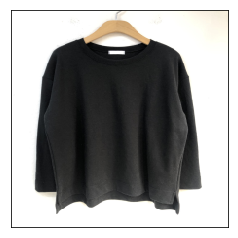

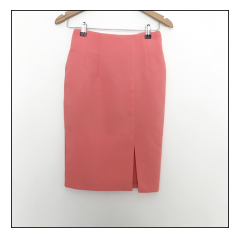

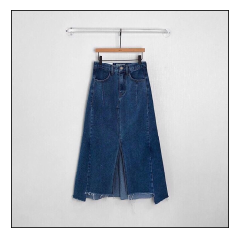

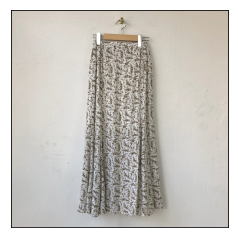

In [49]:
x = recommendation(file_name_1, up_low_1, attr_mat, show=True)

In [50]:
# 2단계에서 나온 유사한 옷 파일 이름 (2)
file_name_raw_2 = similar_2_name_img

In [51]:
file_name_2 = file_name_raw_2.split(".")[0]

In [52]:
up_low_2 = df_total_nmcat.loc[file_name_2][1]

Filename: img_4023284111_34

입력되는 옷 :  top
입력되는 옷 속성 리스트:  [1, 'knit', 'non_printed', 'long', 'dark_black']

추천해야 할 옷 종류 :  bottom
입력한 옷에 어울리는 추천 속성 리스트:  ['light_red', 'jeans', 'pants']

가장 어울리는 속성 :  {'pants', 'light_red'}

추천 결과 :  ['img_3761819676_16', 'img_4137989949_53', 'img_4192856140_19']


d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


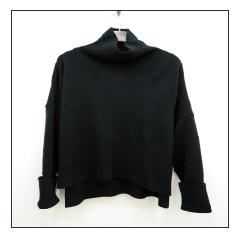

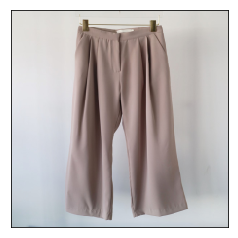

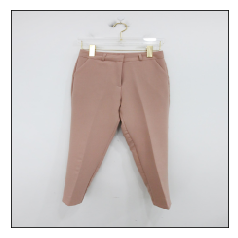

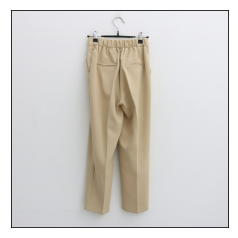

In [53]:
x = recommendation(file_name_2, up_low_2, attr_mat, show=True)

In [54]:
# 2단계에서 나온 유사한 옷 파일 이름 (3)
file_name_raw_3 = similar_3_name_img

In [55]:
file_name_3 = file_name_raw_3.split(".")[0]

In [56]:
up_low_3 = df_total_nmcat.loc[file_name_3][1]

Filename: img_4349219279_16

입력되는 옷 :  top
입력되는 옷 속성 리스트:  [1, 'shirt', 'non_printed', 'long', 'dark_black']

추천해야 할 옷 종류 :  bottom
입력한 옷에 어울리는 추천 속성 리스트:  ['light_red', 'pants', 'skirt']

가장 어울리는 속성 :  {'skirt', 'light_red'}

추천 결과 :  ['img_4338678848_20', 'img_4142904237_16', 'img_4132323907_31']


d:\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


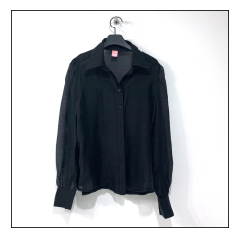

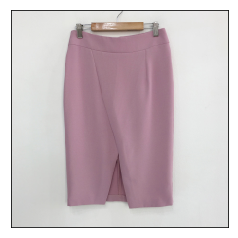

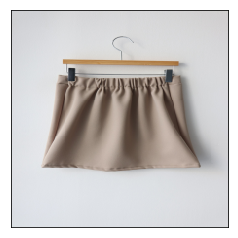

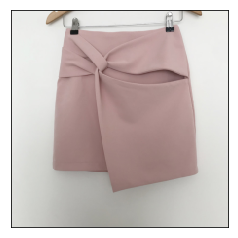

In [57]:
x = recommendation(file_name_3, up_low_3, attr_mat, show=True)